In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
movies_file = 'C:/Users\hahah/Desktop/project_recom/tmdb_5000_movies.csv'
credits_file = 'C:/Users\hahah/Desktop/project_recom/tmdb_5000_credits.csv'
movies = pd.read_csv(movies_file)
credits = pd.read_csv(credits_file)

In [3]:
movies_credits = pd.merge(movies, credits, left_on='id', right_on='movie_id', how='outer')
del movies_credits['movie_id']
del movies_credits['title_y']
df = movies_credits

In [76]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for columns in json_columns:
        df[columns] = df[columns].apply(json.loads)
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df
def pipe_flatten_names(keywords):
    return '|'.join([x['iso_3166_1'] for x in keywords])

credits = load_tmdb_credits(credits_file)
movies = load_tmdb_movies(movies_file)
del credits['title']
df = pd.concat([movies, credits], axis=1)
df['countries']=df['production_countries'].apply(pipe_flatten_names)

In [80]:
liste_countries = set()
for s in df['countries'].str.split('|'):
    liste_countries = set().union(s, liste_countries)
liste_countries = list(liste_countries)
liste_countries.remove('')

In [81]:
df_reduced = df[['title','vote_average','release_date','runtime','budget','revenue','production_companies','production_countries']].reset_index(drop=True)

In [88]:
for countries in liste_countries:
    df_reduced[countries] = df['countries'].str.contains(countries).apply(lambda x:countries if x else 0)
df_reduced[:100]

,title,vote_average,release_date,runtime,budget,revenue,production_companies,production_countries,countries,MC,...,CA,CO,DZ,JO,IE,TW,LT,GY,AU,HK
0,Avatar,7.2,2009-12-10,162.0,237000000,2787965087,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,6.9,2007-05-19,169.0,300000000,961000000,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,6.3,2015-10-26,148.0,245000000,880674609,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,7.6,2012-07-16,165.0,250000000,1084939099,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,John Carter,6.1,2012-03-07,132.0,260000000,284139100,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Interstellar,8.1,2014-11-05,169.0,165000000,675120017,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,...,CA,0,0,0,0,0,0,0,0,0
96,Inception,8.1,2010-07-14,148.0,160000000,825532764,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",NaN,0,...,0,0,0,0,0,0,0,0,0,0
97,Shin Godzilla,6.5,2016-07-29,120.0,15000000,77000000,"[{'name': 'Cine Bazar', 'id': 5896}, {'name': ...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",NaN,0,...,0,0,0,0,0,0,0,0,0,0
98,The Hobbit: An Unexpected Journey,7.0,2012-11-26,169.0,250000000,1021103568,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
for i in range(9,df_reduced.shape[1]):
    for j in range(len(df_reduced)):
        if df_reduced.iloc[j,i]!=0:
            df_reduced.iloc[j,8]=df_reduced.iloc[j,i]
df_reduced['countries']

0        US
1        US
2        US
3        US
4        US
       ... 
4798     MX
4799    NaN
4800     US
4801     CN
4802     US
Name: countries, Length: 4803, dtype: object

In [92]:
df_new=df_reduced[['title','vote_average','release_date','runtime','budget','revenue','production_companies','production_countries','countries']]

In [93]:
df_new.to_excel('new2.xlsx')

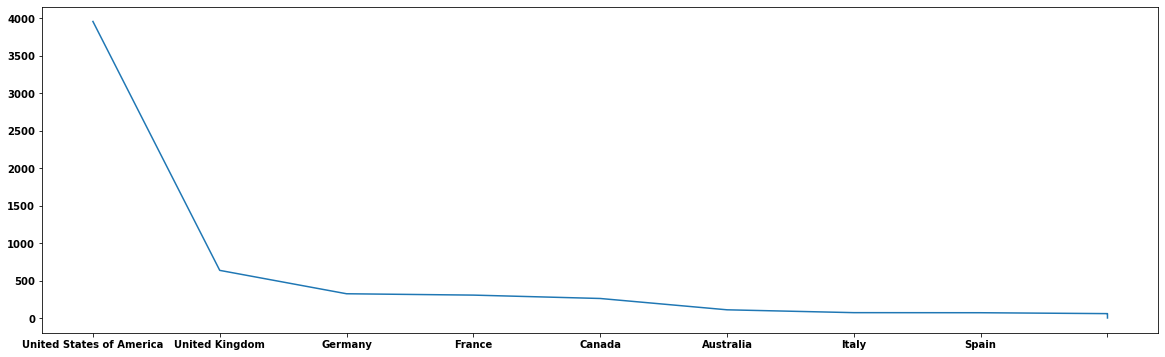

In [73]:
plt.subplots(figsize=(20,6))
plt.plot(labels_selected,sizes)

In [75]:
df_reduced.to_excel('new1.xlsx')